In [1]:
#신경망의 현재의 상태를 지표로 나타낸 것이 손실함수 이다. 
#손실함수에는 mse 와 cee를 사용한다. 
import numpy as np


In [2]:
#MSE구현 
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

In [5]:
#CEE구현 
#delta를 통해 발산 방지 
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t* np.log(y + delta))

In [6]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [7]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'https://storage.googleapis.com/cvdf-datasets/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = dataset_dir = os.getcwd()
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

(x_train, t_train), (x_test, t_test) = load_mnist(normalize =True, one_hot_label = True)


In [9]:
print(x_train.shape)

print(t_train.shape)

(60000, 784)
(60000, 10)


In [10]:
#랜덤으로 batch size만큼 뽑아서 꺼내기 
train_size = x_train.shape[0]
batch_size = 10
batch_mask  = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [11]:
np.random.choice(60000, 10)

array([52068, 37065, 56581, 40936, 35861, 34241, 12696, 44722, 28282,
       52395])

In [12]:
print(t_train.reshape(1, t_train.size))

[[0. 0. 0. ... 0. 1. 0.]]


In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7))/ batch_size

In [14]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [15]:
#수치미분 구현 
#h가 너무 작으면 반올림 오차 발생 
#전방차분의 오차 O(h), 중앙차분의 오차 O(h^2)
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h)) / (2*h)

In [16]:
def function_1(x):
    return 0.01*x**2 + 0.1* x


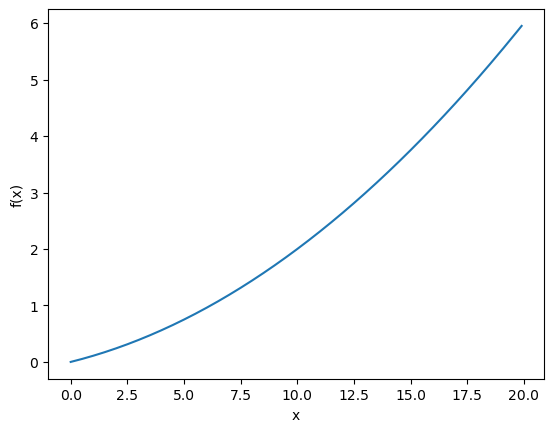

In [17]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [18]:
numerical_diff(function_1, 5)


0.1999999999990898

In [19]:
numerical_diff(function_1, 10)

0.2999999999986347

In [20]:
def function_2(x):
    return x[0]**2 + x[1] ** 2

In [21]:
def function_tmp1(x0):
    return x0*x0 + 4.0 ** 2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [22]:
def function_tmp2(x1):
    return 3.0 ** 2.0 +x1*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [23]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        #f(x+h) 계산 
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val #값 복원 
    return grad
        

In [24]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [25]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [26]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

C:\Users\sjune\AppData\Local\Temp\ipykernel_9780\2894657366.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


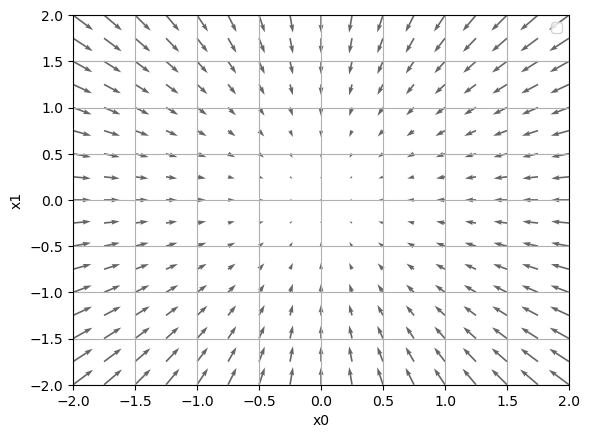

In [27]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [28]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x


In [29]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)


array([-6.11110793e-10,  8.14814391e-10])

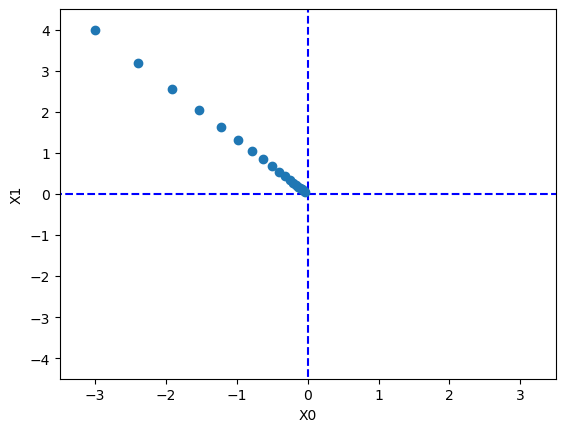

In [30]:
import numpy as np
import matplotlib.pylab as plt



def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [31]:
#학습률이 너무 큰 예시 
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100)


array([-2.58983747e+13, -1.29524862e+12])

In [32]:
#학습률이 너무 작은 예시 
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [33]:
import sys, os 
sys.path.append(os.pardir)
import numpy as np
from functions import softmax, cross_entropy_error
from gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) #정규분포 초기화 
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

    

In [34]:
net = simpleNet()
print(net.W)

[[-0.32893952  0.66652633 -0.67405139]
 [ 0.5147645  -0.52804344 -0.52299163]]


In [35]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.26592433 -0.07532329 -0.8751233 ]


In [36]:
np.argmax(p)

0

In [37]:
t = np.array([0, 0, 1]) #정답레이블 
net.loss(x, t)

1.8492635573396592

In [38]:
def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.29551289  0.21007505 -0.50558794]
 [ 0.44326933  0.31511257 -0.7583819 ]]


In [39]:
#lambda 방식으로 표현 
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)


In [40]:
#학습 알고리즘 구현하기 
import sys, os 
sys.path.append(os.pardir)
from functions import *
from gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std = 0.01):
        #가중치 초기화 
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    def accuracy(self, x, t):
        y = self.predict(x)
        y = argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads 

In [41]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10)
net.params['W1'].shape

(784, 100)

In [42]:
net.params['b1'].shape

(100,)

In [43]:
net.params['W2'].shape

(100, 10)

In [44]:
net.params['b2'].shape

(10,)

In [45]:
x = np.random.rand(100, 784)

In [46]:
y = net.predict(x)

In [47]:
x = np.random.rand(100, 784) #100장분량 더미 입력데이터 
t = np.random.rand(100, 10) #더미 정답 레이블(100장 분량)
grads = net.numerical_gradient(x, t)

grads['W1'].shape
grads['b1'].shape
grads['W2'].shape
grads['b2'].shape

(10,)

In [48]:
import numpy as np

(x_train, t_train), (x_test, t_test) = load_mnist(normalize =True, one_hot_label = True)
train_loss_list = []
#하이퍼 파라미터 
iters_num = 10000 #반복횟수 
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)
for i in range(iters_num):
    #미니배치 획득 
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    #기울기 계산 
    grad = network.numerical_gradient(x_batch, t_batch)
    #매개 변수 갱신 
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    #학습 경과 기록 
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
   

KeyboardInterrupt: 

In [ ]:
import numpy as np 
(x_train, t_train), (x_test, t_test) = load_mnist(normalize =True, one_hot_label = True)
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)
#하이퍼 파라미터 
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []

#1에폭당 반복수 
iter_per_epoch = max(train_size/ batch_size, 1)
for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    #기울기 계산 
    grad = network.numerical_gradient(x_batch, t_batch)
    #매개 변수 갱신 
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    #학습 경과 기록 
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
   



 #1에폭당  정확도 계산 
    if i % iter_per_epoch ==0:
        train_acc = network.accuracy(x_train , t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.xlim(0, 16)
plt.legend(loc='lower right')
plt.show()